In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

Fontes:

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
- https://predictivehacks.com/k-means-elbow-method-code-for-python/

# Construção da amostra

In [ ]:
# Constrói amostra de dados.
# Essa configuração tem um cluster distinto e 3 clusters colocados próximos.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

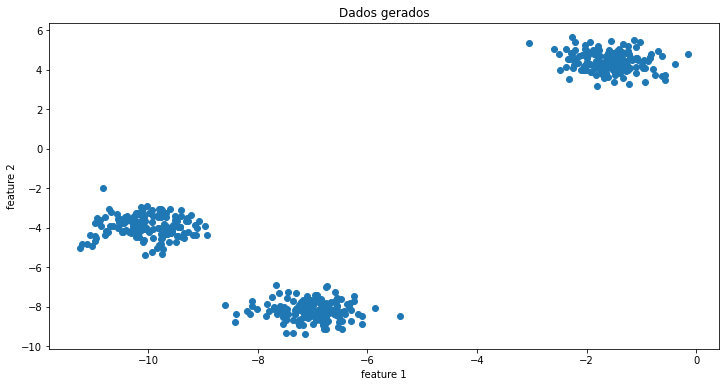

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax.set_title("Dados gerados")
ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2")
ax.scatter(X[:, 0], X[:, 1]);

# Selecionando o número de clusters com o método do cotovelo

O método do cotovelo objetiva encontrar o valor ótimo para k.

Usa os valores calculados com a distorção calculada com a **função de custo**.

Gráfico:

- Eixo x: Valores de k;
- Eixo y: Valores da distorção.

De acordo com a documentação do sklearn:

`inertia_ : float`
Soma das distâncias ao quadrado das amostras ao seu centróide (centro do cluster) mais próximo.

In [ ]:
distorcoes = []
ks = range(1,10)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorcoes.append(kmeans.inertia_)

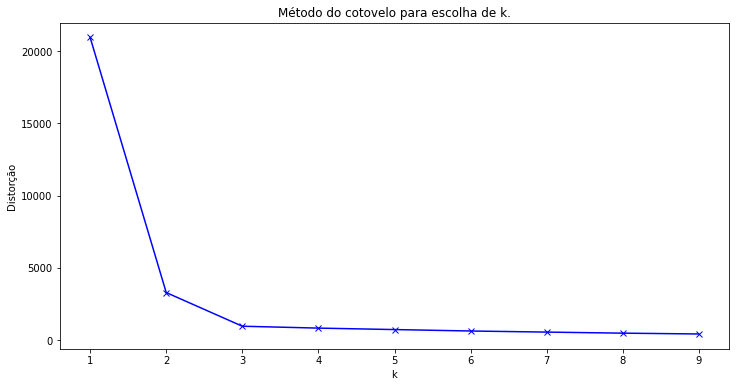

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax.set_title("Método do cotovelo para escolha de k.")
ax.set_xlabel("k")
ax.set_ylabel("Distorção")
ax.plot(ks, distorcoes, 'bx-');

# Selecionando o número de clusters com análise de silhueta sobre a clusterização KMeans

A análise de silhueta pode ser usada para estudar a distância de separação entre os clusters resultantes.

O gráfico de silhueta mostra uma medida da proximidade de quão próximo cada ponto em um cluster está para pontos nos clusters vizinhos e então provê uma maneira de avaliar parâmetros como o número de clusters visualmente.

Essa medida tem um intervalo de $[-1, 1]$.

Coeficientes de silhueta:

- Próximos de +1: indicam que a amostra está longe dos clusters vizinhos.
- Próximos de 0: A amostra está sobre ou muito perto do limite de decisão entre dois clusters vizinhos.
- Valores negativos: indicam que a amostra podem ter sido atribuídas ao cluster errado.



Equação:

$s(x) = \frac{b(x) - a(x)}{max\{a(x), b(x)\}}$

Onde:

- s(x) é o coeficiente do ponto de dado **x**;
- a(o) é a *distância média* entre x e todos os outros pontos de dados no cluster que **x** pertence;
- b(x) é a *distância média mínima* de x para todos os clusters que **x** não pertence.

In [ ]:
def analisa_silhueta(n_clusters):
  # 1 figura com 2 gráficos (ax1 e ax2)
  # ax1 é o gráfico de silhueta
  # ax2 é o gráfico dos clusters
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)
  ax1.set_xlim([-0.1, 1])

  # (n_clusters + 1) * 10 é para inserir espaço entre as silhuetas
  ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

  kmeans = KMeans(n_clusters=n_clusters, random_state=10)
  labels = kmeans.fit_predict(X)

  media_silhueta = silhouette_score(X, labels)
  print(f'Para {n_clusters} clusters, a medida de silhueta média é de {media_silhueta}.')

  # Calcula a medida de silhueta para cada amostra
  medida_silhueta_amostras = silhouette_samples(X, labels)

  y_minimo = 10

  for i in range(n_clusters):
    # Agrega as medidas de silhuetas para amostras pertencentes
    # ao cluster i e então os ordena.
    valores_silhueta_cluster_i = medida_silhueta_amostras[labels == i]
    valores_silhueta_cluster_i.sort()
    tamanho_cluster_i = valores_silhueta_cluster_i.shape[0]
    y_maximo = y_minimo + tamanho_cluster_i

    cor = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_minimo, y_maximo),
                      0,
                      valores_silhueta_cluster_i,
                      facecolor=cor,
                      edgecolor=cor,
                      alpha=0.7)
    
    # Rotula a gráfico de silhueta com seus números de cluster no meio
    ax1.text(-0.05, y_minimo + 0.5 * tamanho_cluster_i, str(i))
    y_minimo = y_maximo + 10  # 10 for the 0 samples

    ax1.set_title("Gráfico de silhueta para os clusters.")
    ax1.set_xlabel("Valores do coeficiente de silhueta")
    ax1.set_ylabel("Labels")

    # Linha vertical para a média do score de slhueta para todos os valores
    ax1.axvline(x=media_silhueta, color="red", linestyle="--")

    ax1.set_yticks([])  # Limpa os rótulos y do gráfico
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Gráfico mostrando os clusters atuais formados
    colors = cm.nipy_spectral(labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Rotulando os clusters
    centros = kmeans.cluster_centers_

    # Desenha círculos brancos nos centróides (centros dos clusters)
    ax2.scatter(centros[:, 0], centros[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centros):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualização dos dados clusterizados.")
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")

    plt.suptitle((f'Análise de silhueta para a clusterização K-Means sobre os dados de amostra com {n_clusters} clusters.'),
                  fontsize=14, fontweight='bold')

Para 2 clusters, a medida de silhueta média é de 0.8172807677693686.


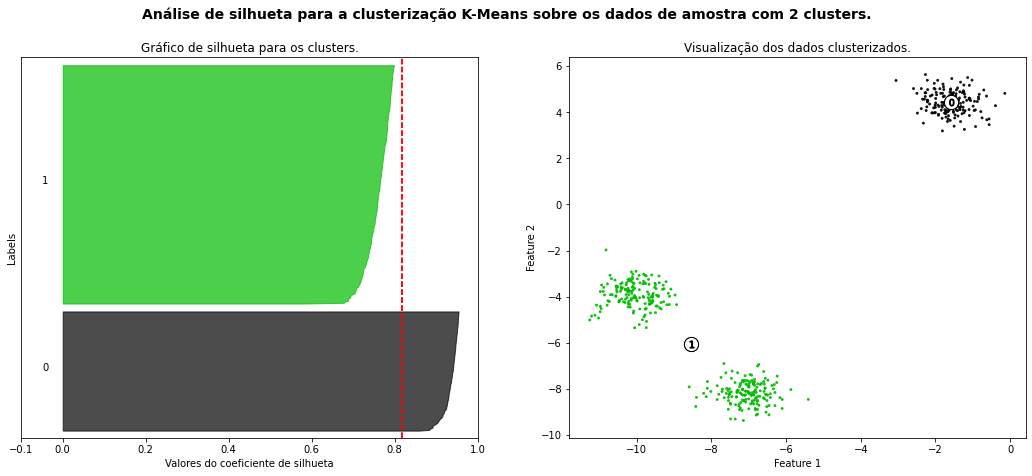

In [ ]:
analisa_silhueta(2)

Para 3 clusters, a medida de silhueta média é de 0.863427309980546.


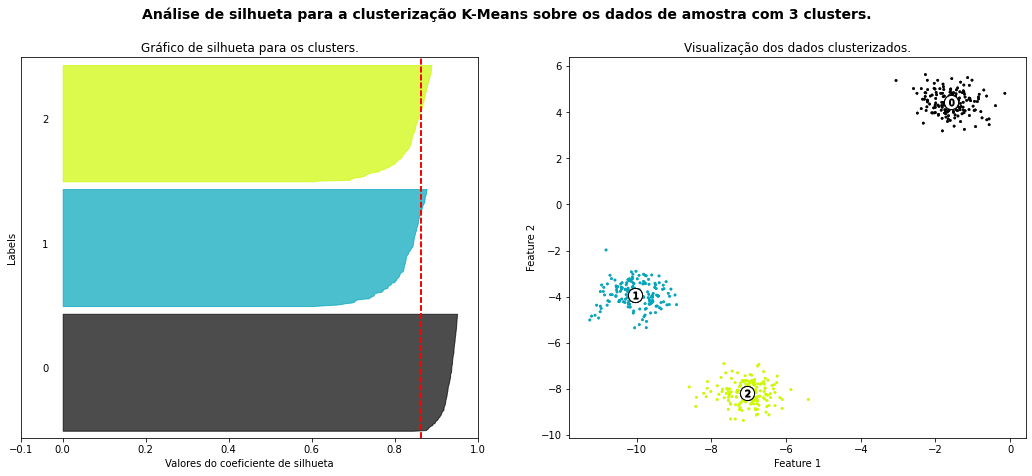

In [ ]:
analisa_silhueta(3)

Para 4 clusters, a medida de silhueta média é de 0.6071925763842486.


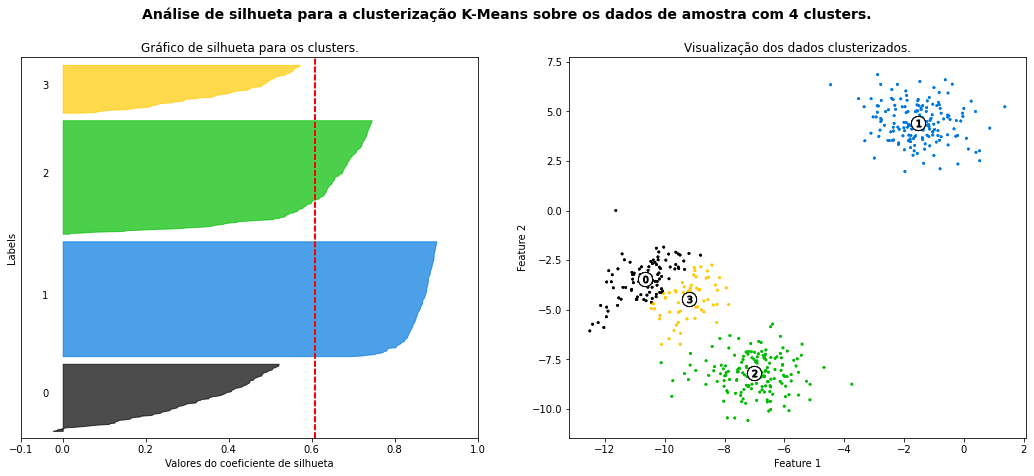

In [ ]:
analisa_silhueta(4)

Para 10 clusters, a medida de silhueta média é de 0.3473955129181726.


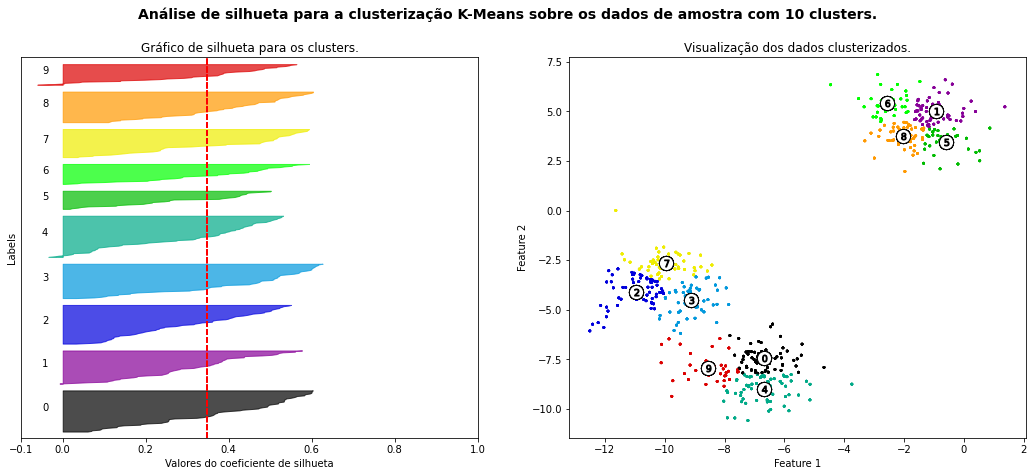

In [ ]:
analisa_silhueta(10)